In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/tmp/ipykernel_14249/3040376338.py:3: DtypeWarning: Columns (20,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


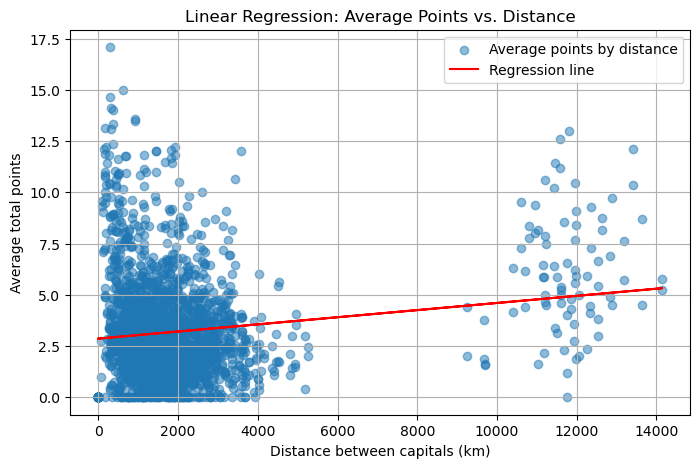

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     50.43
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.64e-12
Time:                        11:07:59   Log-Likelihood:                -5287.2
No. Observations:                2269   AIC:                         1.058e+04
Df Residuals:                    2267   BIC:                         1.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8593      0.072     39.988      0.0

In [4]:
# Load dataset
file_path = '../data/fulldata.csv'
data = pd.read_csv(file_path)

# Group by countries that emit and receive votes to calculate the average
aggregated_data = data.groupby(['from_country', 'to_country'], as_index=False).agg({
    'total_points': 'mean',  # Average points awarded
    'distance': 'mean'      # Average distance
})

# Filter out missing values
aggregated_data = aggregated_data.dropna()

X_agg = aggregated_data['distance']
Y_agg = aggregated_data['total_points']

# Add a constant to the regression model
X_agg = sm.add_constant(X_agg)

# Fit the linear regression model
agg_model = sm.OLS(Y_agg, X_agg).fit()

# Get the summary of the model
agg_summary = agg_model.summary()

# Visualize the results
plt.figure(figsize=(8, 5))
plt.scatter(aggregated_data['distance'], aggregated_data['total_points'], alpha=0.5, label='Average points by distance')
plt.plot(aggregated_data['distance'], agg_model.predict(X_agg), color='red', label='Regression line')
plt.title('Linear Regression: Average Points vs. Distance')
plt.xlabel('Distance between capitals (km)')
plt.ylabel('Average total points')
plt.legend()
plt.grid(True)
plt.show()

# Print the model summary
print(agg_summary)


In [5]:
file_path = '../data/fulldata.csv'
data = pd.read_csv(file_path)
country_info_path = '../data/country_info.csv'
country_info = pd.read_csv(country_info_path)

/tmp/ipykernel_14249/238078281.py:2: DtypeWarning: Columns (20,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [6]:
def analyze_country_data_by_name(country_name, data, country_info):
    """
    Analyze the relationship between distance and historical average points given by a country, 
    using the country's English name as input.

    Parameters:
    - country_name (str): English name of the country giving the votes (e.g., 'Spain').
    - data (DataFrame): Dataset containing voting data with columns 'from_country', 'to_country', 'total_points', 'distance', and 'year'.
    - country_info (DataFrame): Dataset containing country information with columns 'name' (English name) and 'code' (country code).

    Output:
    - Displays a scatter plot with the regression line.
    - Prints the regression summary.
    """
    # Map the country name to its corresponding country code
    country_row = country_info[country_info['name'].str.lower() == country_name.lower()]
    if country_row.empty:
        print(f"Country '{country_name}' not found in the country information dataset.")
        return
    country_code = country_row['code'].values[0]

    # Filter the data for the specified country as the voting country
    country_data = data[data['from_country'] == country_code]

    # Calculate the average points given by the country to each other country by year
    annual_means = country_data.groupby(['to_country', 'year'], as_index=False).agg({
        'total_points': 'mean'
    })

    # Calculate the historical average points given by the country to each other country
    historical_means = annual_means.groupby('to_country', as_index=False).agg({
        'total_points': 'mean'
    })

    # Merge the historical averages with distance data
    distance_data = country_data[['to_country', 'distance']].drop_duplicates()
    historical_means = historical_means.merge(distance_data, on='to_country', how='left')

    # Drop rows with missing values
    historical_means = historical_means.dropna()

    # Define the independent (X) and dependent (Y) variables for regression
    X_hist = historical_means['distance']
    Y_hist = historical_means['total_points']

    # Add a constant for the regression model
    X_hist = sm.add_constant(X_hist)

    # Fit a linear regression model
    hist_model = sm.OLS(Y_hist, X_hist).fit()

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.scatter(historical_means['distance'], historical_means['total_points'], alpha=0.7, label='Historical average points')
    plt.plot(historical_means['distance'], hist_model.predict(X_hist), color='red', label='Regression line')
    plt.title(f'Regression: Historical Avg Points vs. Distance ({country_name})')
    plt.xlabel('Distance between capitals (km)')
    plt.ylabel('Historical average points given')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the regression summary
    print(hist_model.summary())

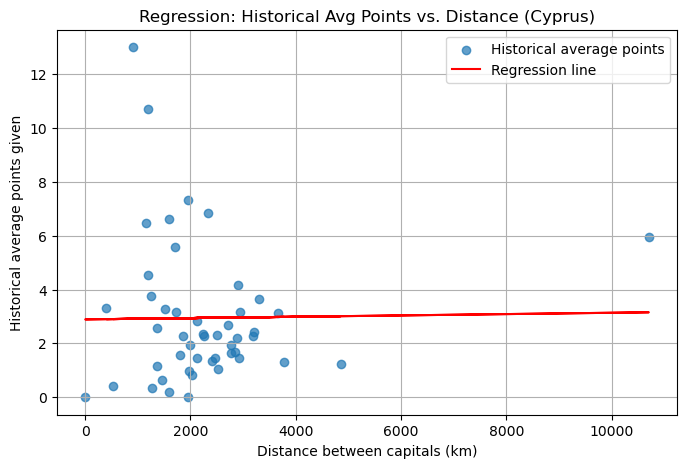

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.009612
Date:                Wed, 22 Jan 2025   Prob (F-statistic):              0.922
Time:                        11:08:00   Log-Likelihood:                -114.13
No. Observations:                  48   AIC:                             232.3
Df Residuals:                      46   BIC:                             236.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8902      0.694      4.166      0.0

In [7]:
analyze_country_data_by_name('Cyprus', data, country_info)

## Without Australia:

In [8]:
def analyze_country_votes_by_name_except_Australia(country_name, data, country_info):
    """
    Analyze the relationship between distance and historical average points given by a country, 
    using the country's English name as input. Excludes any data related to Australia.

    Parameters:
    - country_name (str): English name of the country giving the votes (e.g., 'Spain').
    - data (DataFrame): Dataset containing voting data with columns 'from_country', 'to_country', 'total_points', 'distance', and 'year'.
    - country_info (DataFrame): Dataset containing country information with columns 'name' (English name) and 'code' (country code).

    Output:
    - Displays a scatter plot with the regression line.
    - Prints the regression summary.
    """
    # Map the country name to its corresponding country code
    country_row = country_info[country_info['name'].str.lower() == country_name.lower()]
    if country_row.empty:
        print(f"Country '{country_name}' not found in the country information dataset.")
        return
    country_code = country_row['code'].values[0]

    # Exclude Australia-related data
    australia_code = country_info[country_info['name'].str.lower() == 'australia']['code'].values[0]
    filtered_data = data[(data['from_country'] != australia_code) & (data['to_country'] != australia_code)]

    # Filter the data for the specified country as the voting country
    country_data = filtered_data[filtered_data['from_country'] == country_code]

    # Calculate the average points given by the country to each other country by year
    annual_means = country_data.groupby(['to_country', 'year'], as_index=False).agg({
        'total_points': 'mean'
    })

    # Calculate the historical average points given by the country to each other country
    historical_means = annual_means.groupby('to_country', as_index=False).agg({
        'total_points': 'mean'
    })

    # Merge the historical averages with distance data
    distance_data = country_data[['to_country', 'distance']].drop_duplicates()
    historical_means = historical_means.merge(distance_data, on='to_country', how='left')

    # Drop rows with missing values
    historical_means = historical_means.dropna()

    # Define the independent (X) and dependent (Y) variables for regression
    X_hist = historical_means['distance']
    Y_hist = historical_means['total_points']

    # Add a constant for the regression model
    X_hist = sm.add_constant(X_hist)

    # Fit a linear regression model
    hist_model = sm.OLS(Y_hist, X_hist).fit()

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.scatter(historical_means['distance'], historical_means['total_points'], alpha=0.7, label='Historical average points')
    plt.plot(historical_means['distance'], hist_model.predict(X_hist), color='red', label='Regression line')
    plt.title(f'Regression: Historical Avg Points vs. Distance ({country_name}) (Excluding Australia)')
    plt.xlabel('Distance between capitals (km)')
    plt.ylabel('Historical average points given')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the regression summary
    print(hist_model.summary())

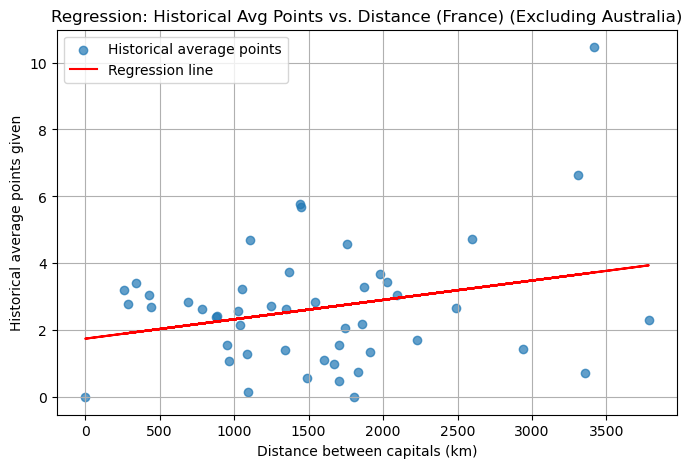

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.421
Date:                Wed, 22 Jan 2025   Prob (F-statistic):             0.0708
Time:                        11:08:00   Log-Likelihood:                -96.457
No. Observations:                  48   AIC:                             196.9
Df Residuals:                      46   BIC:                             200.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7492      0.553      3.166      0.0

In [9]:
analyze_country_votes_by_name_except_Australia('France', data, country_info)

### Vales Regression (Loss of Sanity)

Index(['Unnamed: 0', 'year', 'round', 'from_country', 'to_country',
       'total_points', 'tele_points', 'jury_points', 'Year_from',
       'iso-alpha-3_from', 'chrstprotpct_from', 'chrstcatpct_from',
       'chrstorthpct_from', 'judgenpct_from', 'islmgenpct_from',
       'nonreligpct_from', 'StateAbb_from', 'city_from', 'lat_from',
       'lon_from', 'GDP per capita (current US$)_from',
       'Population, total_from', 'Year_to', 'iso-alpha-3_to',
       'chrstprotpct_to', 'chrstcatpct_to', 'chrstorthpct_to', 'judgenpct_to',
       'islmgenpct_to', 'nonreligpct_to', 'StateAbb_to', 'city_to', 'lat_to',
       'lon_to', 'GDP per capita (current US$)_to', 'Population, total_to',
       'distance'],
      dtype='object')


/tmp/ipykernel_14249/3106296750.py:2: DtypeWarning: Columns (20,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


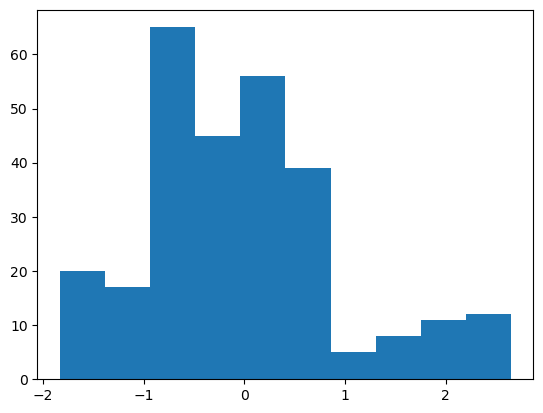

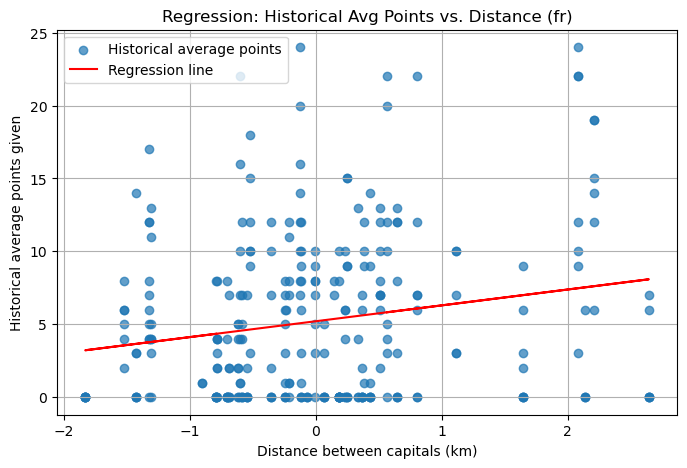

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     10.53
Date:                Wed, 22 Jan 2025   Prob (F-statistic):            0.00132
Time:                        11:32:23   Log-Likelihood:                -871.47
No. Observations:                 278   AIC:                             1747.
Df Residuals:                     276   BIC:                             1754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       1.0880      0.335      3.244      0.0

In [35]:
file_path = '../data/fulldata.csv'
data = pd.read_csv(file_path)
print(data.columns)
coutry_name = "fr"
data = data[data['from_country'] == coutry_name]
data = data[data['to_country'] != 'au']
#data= data[data["to_country"] != "il"]
data = data[data["year"] >= 2016]

data["distance"] = (data["distance"] - data["distance"].mean()) / data[
    "distance"
].std() 

data["constant"] = 1
plt.hist(data["distance"])
plt.show()
linear_model = sm.OLS( data["total_points"],data[["distance", "constant"]]).fit()
data["prediction"] = linear_model.predict(data[["distance", "constant"]])
# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(data["distance"],data["total_points"], alpha=0.7, label='Historical average points')
plt.plot(data["distance"],data["prediction"] , color='red', label='Regression line')
plt.title(f'Regression: Historical Avg Points vs. Distance ({coutry_name})') 
plt.xlabel('Distance between capitals (km)')
plt.ylabel('Historical average points given')
plt.legend()
plt.grid(True)
plt.show()

    # Print the regression summary
print(linear_model.summary())